In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import sin

#### 学習前のモデルからサンプリング

In [10]:
w = []
for _ in range(5):
    w_dist = stats.multivariate_normal(np.zeros(4), np.eye(4)).rvs(1)
    w.append(w_dist)

In [11]:
def model_sample(w, x):
    X = [1, x, x**2, x**3]
    return w.T @ X

/Users/osadakouhei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower  left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


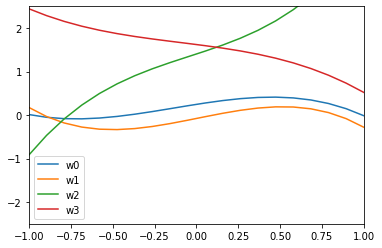

In [15]:
x = np.linspace(-1, 1, 20)
for i in range(4):
    plt.plot(x, model_sample(w[i], x), label="w%.f"%i)
    plt.ylim(-2.5, 2.5)
    plt.xlim(-1.0, 1.0)
plt.legend(loc = "lower  left")

めっちゃランダムな感じ

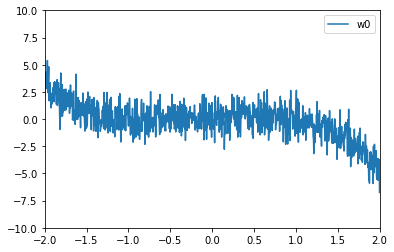

In [19]:
x = np.linspace(-2, 2, 1000)
y = stats.multivariate_normal(model_sample(w[0], x), np.eye(1000)).rvs(1)
plt.xlim(-2, 2)
plt.ylim(-10, 10)
plt.plot(x, y, label="w0")
plt.legend(loc="upper right")

In [1]:
class LinearModel():
    def __init__(self, M):
        self.M = M
        self.m = np.zeros(self.M)
        self.L = np.eye(self.M)
        
    def predict(self, x_new):
        x_vec = np.array([x_new**m for m in range(self.M)])
        mu_pred = self.m.T @ x_vec
        sigma_pred = np.sqrt(1/lamb + x_vec.T@np.linalg.inv(self.L)@x_vec)
        return mu_pred, sigma_pred
    
    def fit(self, x_d, y_d):
        N = len(x_d)
        x_ns = np.array([[[x**m for m in range(self.M)]] for x in x_d])
        x_ns_T = np.array([np.array([[x**i for i in range(self.M)]]).T for x in x_d])
        x_y = np.array([[x**m for m in range(self.M)] for x in x_d])
        L_new = lamb * sum(x_ns * x_ns_T) + self.L 
        m_new = np.linalg.inv(L_new)@(lamb * sum(np.array([y_d]).T * x_y) + self.L@self.m) # 1*4
        self.m = m_new
        self.L = L_new

In [326]:
x_d = np.linspace(0, 2*np.pi, 21)
y_d = np.sin(x_d)
lamb = 10

sin(x)を学習させる！

In [327]:
def Simulator(h, w, M):
    model = LinearModel(M)
    model.fit(x_d, y_d)
    x_pred = np.linspace(-3, 8, 30)
    mu_pred = []
    sigma_pred = []
    p025 = []
    p975 = []
    for i in x_pred:
        a, b = model.predict(i)
        mu_pred.append(a)
        sigma_pred.append(b)
    for i in range(len(mu_pred)):
        a, b = stats.norm.ppf([0.025, 0.975], loc = mu_pred[i], scale = sigma_pred[i])
        p025.append(a)
        p975.append(b)
    ax[h, w].plot(x_pred, mu_pred)
    ax[h, w].scatter(x_d, np.sin(x_d))
    ax[h, w].plot(x_pred, p025)
    ax[h, w].plot(x_pred, p975)
    ax[h, w].set_title("M = %.f" % M)
    ax[h, w].set_xlim(-2.5, 8.0)
    ax[h, w].set_ylim(-2, 2)

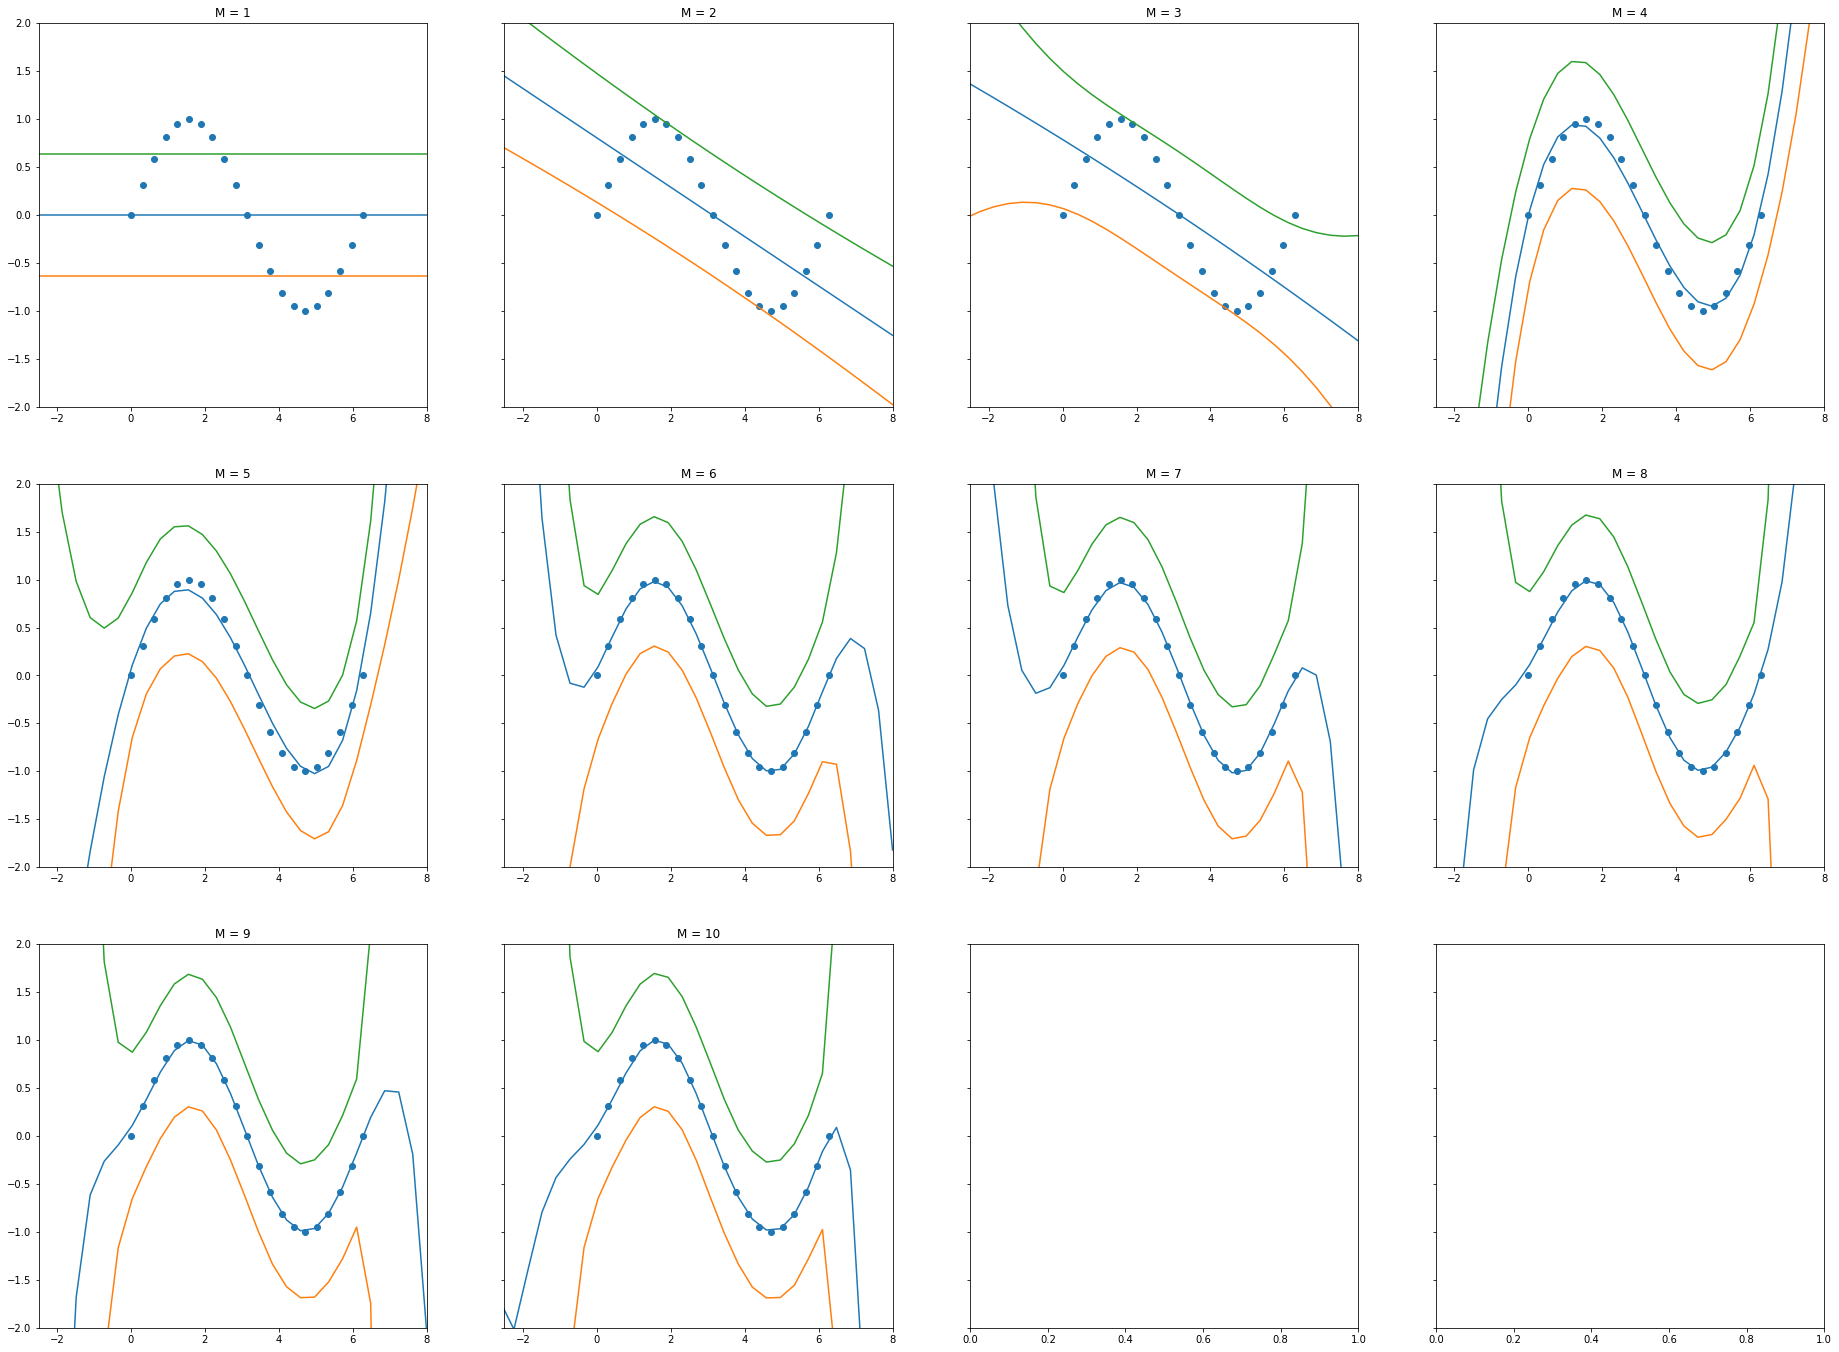

In [328]:
fig, ax = plt.subplots(3, 4, figsize=(32, 24), sharey = True)
for j in range(1, 11):
    h = (j-1)//4
    w = (j-1) % 4
    Simulator(h, w, j)